In [254]:
ord('С')%5

2

In [255]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets as ds
import sklearn.cluster as cl
import sklearn.metrics as me
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings as fw
fw('ignore')

In [256]:
def getsil(x,ypred):
    cluster_labels = np.unique(ypred)
    n_clusters  = cluster_labels.shape[0]
    silhouette_values = me.silhouette_samples(x,ypred)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for c in cluster_labels:
        c_silhouette_values = silhouette_values[ypred == c]
        c_silhouette_values.sort()
        y_ax_upper += len(c_silhouette_values)
        color = ["orange", "lightgreen", "lightblue","green", "red", "blue"][c]  
        plt.barh(range(y_ax_lower, y_ax_upper), 
                c_silhouette_values, 
                height = 1.0, 
                edgecolor='none', color = color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_values)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Кластер')
    plt.xlabel('Коэффициент силуэта')
    plt.tight_layout()
    plt.show()

# Кластерный анализ

## Сравнение работы алгоритмов кластеризации на синтетических наборах данных

#### Blobs

Визуализируем объекты с исходными метками:

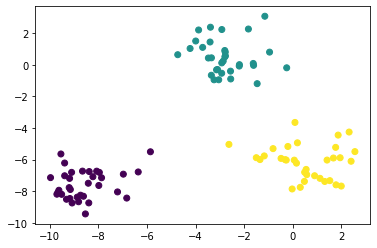

In [257]:
x,y = ds.make_blobs()
plt.scatter(x=x[:,0], y=x[:,1], c=y)

Кластеризуем с помощью KMeans

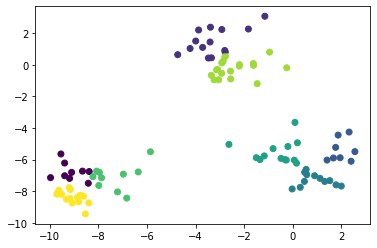

In [258]:
ypred = cl.KMeans().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

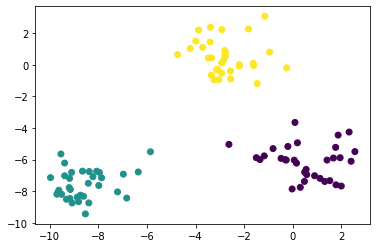

In [259]:
ypred = cl.KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

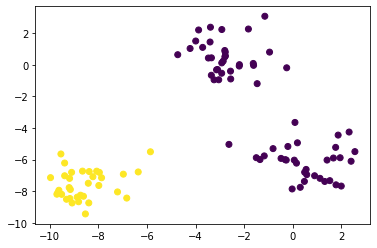

In [260]:
ypred = cl.AgglomerativeClustering().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

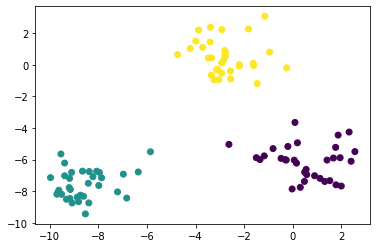

In [261]:
ypred = cl.AgglomerativeClustering(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

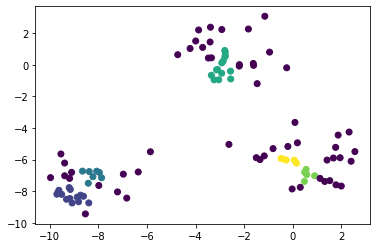

In [262]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

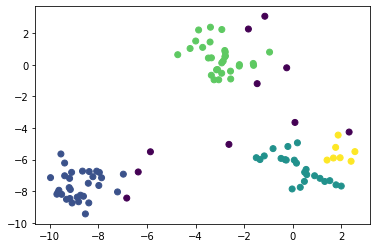

In [263]:
ypred = cl.DBSCAN(eps=1, min_samples=5).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Moons

Визуализируем объекты с исходными метками:

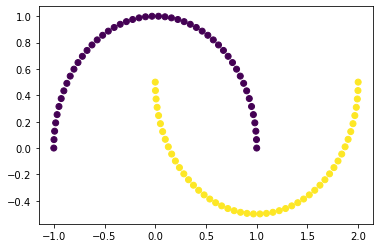

In [264]:
x,y = data = ds.make_moons()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

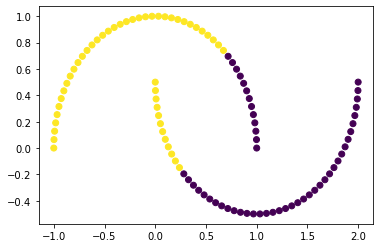

In [265]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

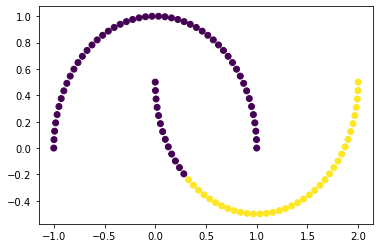

In [266]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

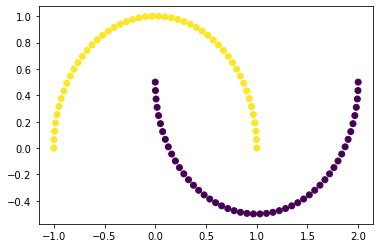

In [267]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Circles

Визуализируем объекты с исходными метками:

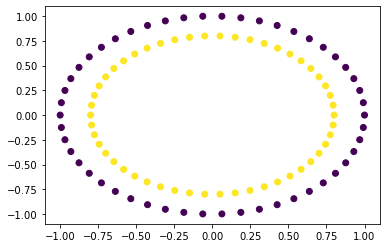

In [268]:
x,y = data = ds.make_circles()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

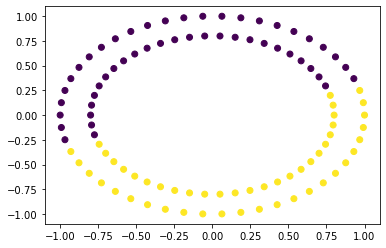

In [269]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

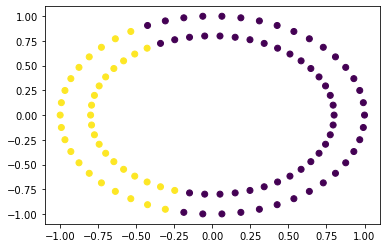

In [270]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

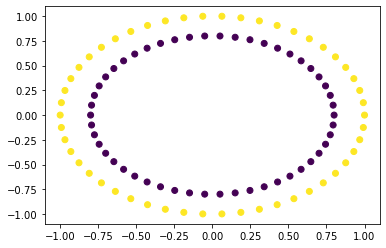

In [271]:
clust = cl.DBSCAN(eps=0.18, min_samples=3)
ypred = clust.fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

## Кластеризация выбранного набора данных

Все параметры в датасете категориальные, поэтому закодируем буквенные обозначения (метки) в цифровой вид и отделим целевой параметр

In [272]:
data = pd.read_csv('mushrooms.csv')

LE = sk.preprocessing.LabelEncoder()
for i in data.columns:
    data.loc[:,i] = LE.fit_transform(data.loc[:,i])

x = data.iloc[:,1:]
y = data.iloc[:,:1]

Рассмотрим различное количество кластеров и оценку силуэтов для каждого

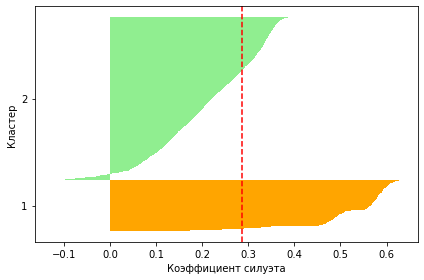

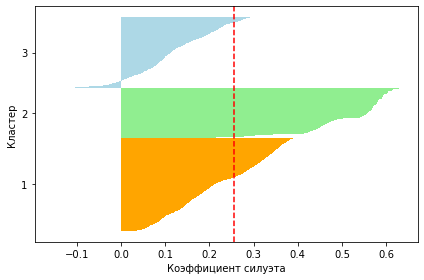

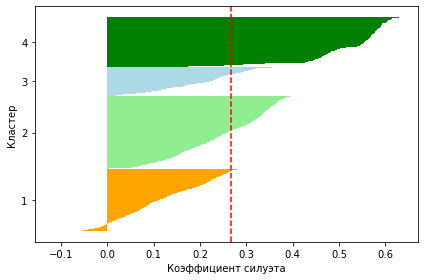

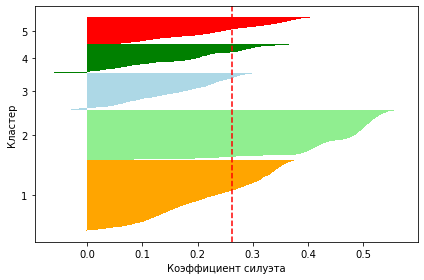

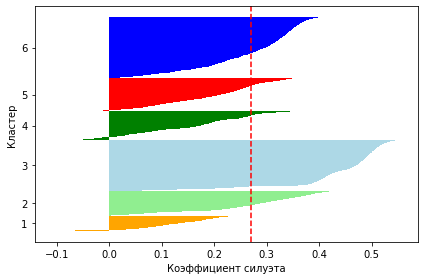

In [273]:
for i in range(2,7):
    cluster = cl.KMeans(n_clusters=i)
    ypred = cluster.fit_predict(x)

    cluster_labels = np.unique(ypred)
    n_clusters  = cluster_labels.shape[0]
    silhouette_values = me.silhouette_samples(x,ypred)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for c in cluster_labels:
        c_silhouette_values = silhouette_values[ypred == c]
        c_silhouette_values.sort()
        y_ax_upper += len(c_silhouette_values)
        color = ["orange", "lightgreen", "lightblue","green", "red", "blue"][c]  
        plt.barh(range(y_ax_lower, y_ax_upper), 
                c_silhouette_values, 
                height = 1.0, 
                edgecolor='none', color = color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_values)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Кластер')
    plt.xlabel('Коэффициент силуэта')
    plt.tight_layout()
    plt.show()

Так как при числе кластеров более 2 силуэт у одного из кластеров будет практически целиком ниже среднего значения, возьмем число кластеров равное 2

Кластеризуем с помощью KMeans

In [274]:
cluster = cl.KMeans(n_clusters=2)
ypred = cluster.fit_predict(x)

print(me.cluster.rand_score(y.iloc[:,0],ypred))
tempu, tempc = np.unique(ypred, return_counts=True)
print(dict(zip(tempu,tempc)))

0.587319846576028
{0: 6188, 1: 1936}


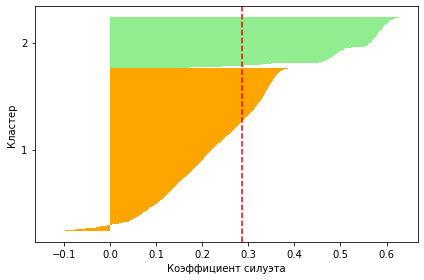

In [275]:
getsil(x,ypred)

Кластеризуем с помощью AgglomerativeClustering

In [276]:
cluster = cl.AgglomerativeClustering(n_clusters=2)
ypred = cluster.fit_predict(x)

print(me.cluster.rand_score(y.iloc[:,0],ypred))
tempu, tempc = np.unique(ypred, return_counts=True)
print(dict(zip(tempu,tempc)))

0.5848671578469219
{0: 6148, 1: 1976}


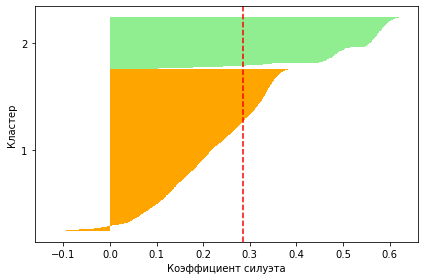

In [277]:
getsil(x,ypred)

Кластеризуем с помощью DBSCAN

In [278]:
cluster = cl.DBSCAN(eps=5,min_samples=200)
ypred = cluster.fit_predict(x)

print(me.cluster.rand_score(y.iloc[:,0],ypred))
tempu, tempc = np.unique(ypred, return_counts=True)
print(dict(zip(tempu,tempc)))

0.6120556100375244
{-1: 868, 0: 5510, 1: 1746}


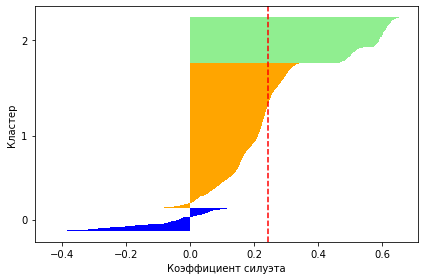

In [279]:
getsil(x,ypred)